In [1]:
import pandas as pd

# Load the main data CSV file
main_data_df = pd.read_csv('D:\worldbank.csv', skiprows=3)

# Show the first few rows of the dataframe
print(main_data_df.head())

  Country Name Country Code                            Indicator Name   
0        Aruba          ABW  Urban population (% of total population)  \
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code       1960          1961          1962          1963   
0  SP.URB.TOTL.IN.ZS     50.776     50.761000     50.746000     50.730000  \
1        SP.URB.TOTL  27728.000  28330.000000  28764.000000  29157.000000   
2        SP.URB.GROW        NaN      2.147858      1.520329      1.357042   
3        SP.POP.TOTL  54608.000  55811.000000  56682.000000  57475.000000   
4        SP.POP.GROW        NaN      2.179059      1.548572      1.389337   

           1964          1965  ...           2014           2015   
0     50.715000     50.700000 

In [2]:
# Show the first few rows of the dataframe
print(main_data_df.head())
print('Dataframe loaded with the correct header.')

  Country Name Country Code                            Indicator Name   
0        Aruba          ABW  Urban population (% of total population)  \
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code       1960          1961          1962          1963   
0  SP.URB.TOTL.IN.ZS     50.776     50.761000     50.746000     50.730000  \
1        SP.URB.TOTL  27728.000  28330.000000  28764.000000  29157.000000   
2        SP.URB.GROW        NaN      2.147858      1.520329      1.357042   
3        SP.POP.TOTL  54608.000  55811.000000  56682.000000  57475.000000   
4        SP.POP.GROW        NaN      2.179059      1.548572      1.389337   

           1964          1965  ...           2014           2015   
0     50.715000     50.700000 

In [3]:
# First, let's identify the correct column names for the indicators of interest
indicators = ['CO2 emissions (metric tons per capita)', 'GDP (current US$)',
             'Arable land (% of land area)', 'Forest area (% of land area)',
             'Electric power consumption (kWh per capita)', 'Access to electricity (% of population)',
             'Energy use (kg of oil equivalent per capita)']

# Check if these indicators are present in the dataframe
for indicator in indicators:
    if indicator not in main_data_df.columns:
        print(indicator + ' not found')
    else:
        print(indicator + ' found')

CO2 emissions (metric tons per capita) not found
GDP (current US$) not found
Arable land (% of land area) not found
Forest area (% of land area) not found
Electric power consumption (kWh per capita) not found
Access to electricity (% of population) not found
Energy use (kg of oil equivalent per capita) not found


In [4]:
# Print the unique indicator names to find the correct ones for the analysis
unique_indicators = main_data_df['Indicator Name'].unique()
print(unique_indicators[:50])  # Print the first 50 unique indicators to start

['Urban population (% of total population)' 'Urban population'
 'Urban population growth (annual %)' 'Population, total'
 'Population growth (annual %)'
 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Community health workers (per 1,000 people)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Agriculture, forestry, and fishing, value added (% of GDP)'
 'CPIA public sector management and institutions cluster average (1=low to 6=high)'
 'Ease of doing business rank (1=most business-friendly regulations)'
 'Terrestrial and marine protected areas (% of total territorial area)'
 'Marine protected areas (% of territorial waters)'
 'Terrestrial protected areas (% of total land area)'
 'Annual freshwater withdrawals, total (% of internal resources)'
 'Annual f

In [5]:
# Print the next set of unique indicator names to find the correct ones for the analysis
print(unique_indicators[50:100])  # Print the next 50 unique indicators

['Electric power consumption (kWh per capita)'
 'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)'
 'Renewable energy consumption (% of total final energy consumption)'
 'Electricity production from renewable sources, excluding hydroelectric (% of total)'
 'Electricity production from renewable sources, excluding hydroelectric (kWh)'
 'Renewable electricity output (% of total electricity output)'
 'Electricity production from oil sources (% of total)'
 'Electricity production from nuclear sources (% of total)'
 'Electricity production from natural gas sources (% of total)'
 'Electricity production from hydroelectric sources (% of total)'
 'Electricity production from coal sources (% of total)'
 'Access to electricity (% of population)'
 'Foreign direct investment, net inflows (% of GDP)'
 'Cereal yield (kg per hectare)'
 'Average precipitation in depth (mm per year)'
 'Agricultural irrigated land (% of total agricultural land)'
 'Forest area (% of land area)' 'Fores

In [6]:
# Print the next set of unique indicator names to find the remaining ones for the analysis
print(unique_indicators[100:150])  # Print the next 50 unique indicators

[]


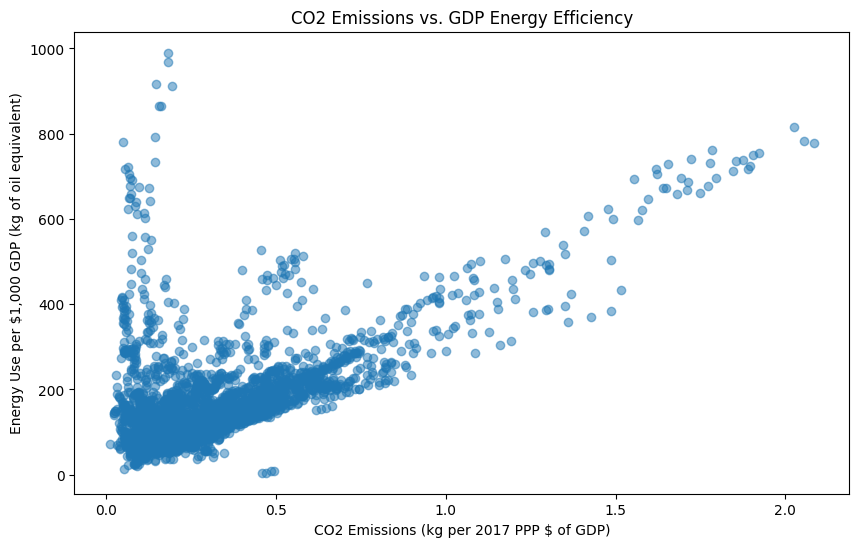

In [8]:
import matplotlib.pyplot as plt
# Filter the dataframe for the CO2 emissions and GDP indicators
co2_emissions_df = main_data_df[main_data_df['Indicator Name'] == 'CO2 emissions (kg per 2017 PPP $ of GDP)']
energy_use_gdp_df = main_data_df[main_data_df['Indicator Name'] == 'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)']

# Since the data is spread across years, we need to transform the dataframe
# We will melt the dataframe to have years as a single column and the values as another column
co2_emissions_melted = co2_emissions_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                              var_name='Year', value_name='CO2 Emissions')
energy_use_gdp_melted = energy_use_gdp_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                                var_name='Year', value_name='Energy Use per GDP')

# Merge the two melted dataframes on 'Country Code' and 'Year'
merged_df = pd.merge(co2_emissions_melted, energy_use_gdp_melted, on=['Country Code', 'Year'])

# Plot CO2 emissions vs. GDP (energy efficiency)
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['CO2 Emissions'], merged_df['Energy Use per GDP'], alpha=0.5)
plt.title('CO2 Emissions vs. GDP Energy Efficiency')
plt.xlabel('CO2 Emissions (kg per 2017 PPP $ of GDP)')
plt.ylabel('Energy Use per $1,000 GDP (kg of oil equivalent)')
plt.show()

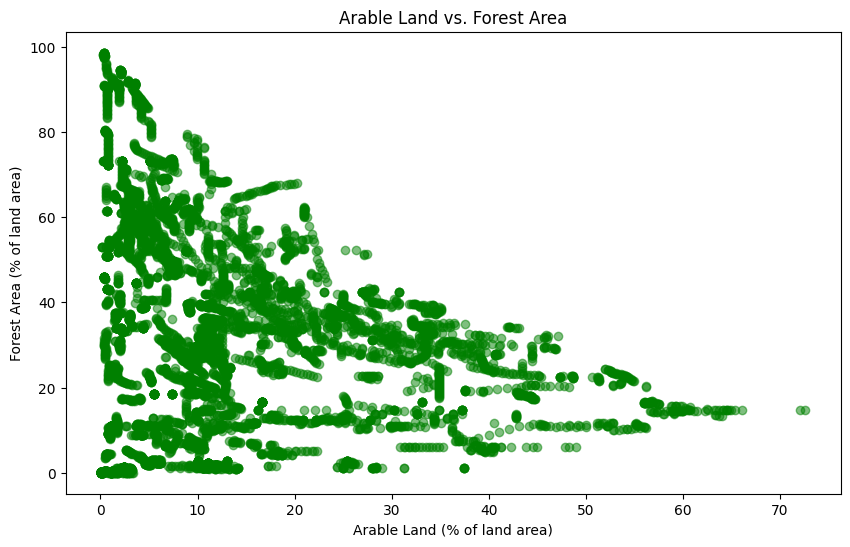

In [10]:
# Filter the dataframe for the arable land and forest area indicators
arable_land_df = main_data_df[main_data_df['Indicator Name'] == 'Arable land (% of land area)']
forest_area_df = main_data_df[main_data_df['Indicator Name'] == 'Forest area (% of land area)']

# Melt the dataframes to have years as a single column and the values as another column
arable_land_melted = arable_land_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                          var_name='Year', value_name='Arable Land')
forest_area_melted = forest_area_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                          var_name='Year', value_name='Forest Area')

# Merge the two melted dataframes on 'Country Code' and 'Year'
merged_land_df = pd.merge(arable_land_melted, forest_area_melted, on=['Country Code', 'Year'])

# Plot Arable land vs. Forest area
plt.figure(figsize=(10, 6))
plt.scatter(merged_land_df['Arable Land'], merged_land_df['Forest Area'], alpha=0.5, color='green')
plt.title('Arable Land vs. Forest Area')
plt.xlabel('Arable Land (% of land area)')
plt.ylabel('Forest Area (% of land area)')
plt.show()

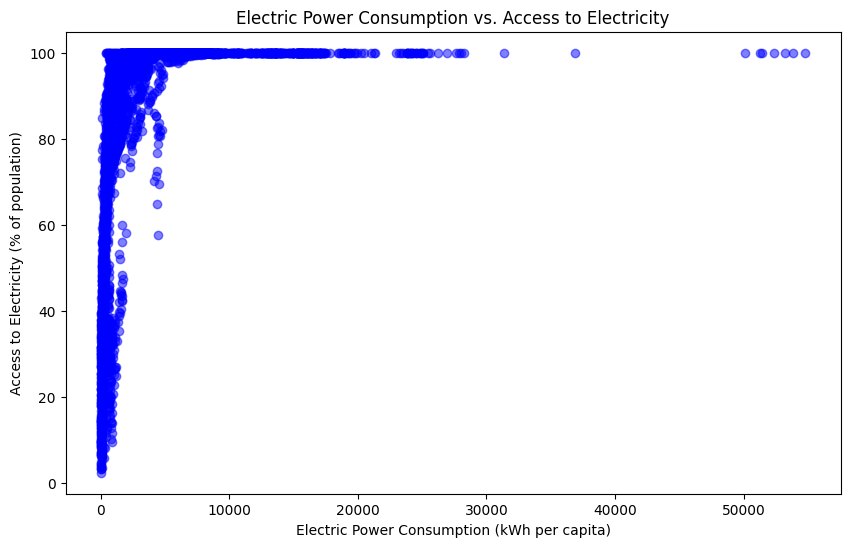

In [11]:
# Filter the dataframe for electric power consumption and access to electricity indicators
electric_power_consumption_df = main_data_df[main_data_df['Indicator Name'] == 'Electric power consumption (kWh per capita)']
access_electricity_df = main_data_df[main_data_df['Indicator Name'] == 'Access to electricity (% of population)']

# Melt the dataframes to have years as a single column and the values as another column
electric_power_consumption_melted = electric_power_consumption_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                                                var_name='Year', value_name='Electric Power Consumption')
access_electricity_melted = access_electricity_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                                        var_name='Year', value_name='Access to Electricity')

# Merge the two melted dataframes on 'Country Code' and 'Year'
merged_electricity_df = pd.merge(electric_power_consumption_melted, access_electricity_melted, on=['Country Code', 'Year'])

# Plot Electric power consumption vs. Access to electricity
plt.figure(figsize=(10, 6))
plt.scatter(merged_electricity_df['Electric Power Consumption'], merged_electricity_df['Access to Electricity'], alpha=0.5, color='blue')
plt.title('Electric Power Consumption vs. Access to Electricity')
plt.xlabel('Electric Power Consumption (kWh per capita)')
plt.ylabel('Access to Electricity (% of population)')
plt.show()

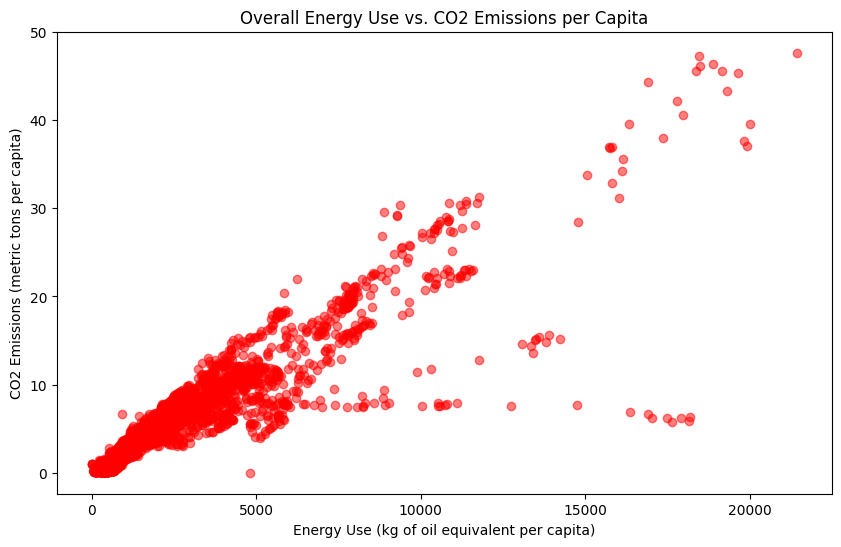

In [12]:
# Filter the dataframe for overall energy use and CO2 emissions indicators
overall_energy_use_df = main_data_df[main_data_df['Indicator Name'] == 'Energy use (kg of oil equivalent per capita)']
co2_emissions_df = main_data_df[main_data_df['Indicator Name'] == 'CO2 emissions (metric tons per capita)']

# Melt the dataframes to have years as a single column and the values as another column
overall_energy_use_melted = overall_energy_use_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                                      var_name='Year', value_name='Overall Energy Use')
co2_emissions_melted = co2_emissions_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                            var_name='Year', value_name='CO2 Emissions per Capita')

# Merge the two melted dataframes on 'Country Code' and 'Year'
merged_energy_co2_df = pd.merge(overall_energy_use_melted, co2_emissions_melted, on=['Country Code', 'Year'])

# Plot Overall energy use vs. CO2 emissions
plt.figure(figsize=(10, 6))
plt.scatter(merged_energy_co2_df['Overall Energy Use'], merged_energy_co2_df['CO2 Emissions per Capita'], alpha=0.5, color='red')
plt.title('Overall Energy Use vs. CO2 Emissions per Capita')
plt.xlabel('Energy Use (kg of oil equivalent per capita)')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.show()